# Project 2: Wrangling and Analyze Data

By: Victoria Asefon


## Table of Content
- <a href="#intro">Introduction</a>
- <a href="#gather">Data Gathering</a>
- <a href="#access">Data Assessment</a>
- <a href="#summary">Assessment Summary</a>
- <a href="#clean">Data Cleaning</a>
- <a href="#analyze">Analysis and Visualization</a>
- <a href="#conclude">Conclusion & Limitation</a>

<a id='intro'></a>
# Introduction

WeRateDogs is a Twitter account that rates people's dogs with a humourous comment about the dog. These ratings almost always have a denominator of 10, while the numerators can be greater than 10. Sometimes, they mention the breed of the dog in their tweets, and other times, they don’t. WeRateDogs has over 4 million followers and has received international media coverage.

The dataset used in this project is a tweet_archive of all tweets from the account Twitter `@dog_rates` which was provided by Udacity. This archive contains basic tweet data for over 2000 tweets up till August 1, 2017.

The Data Gathering process is comprises of 3 methods of gathering data:
1. **The WeRateDogs Twitter archive**:  To be downloaded manually.


2. **The tweet image predictions**: image_predictions.tsv... To be downloaded programmatically.


3. **Additional data from the Twitter API**: Each tweet's retweet count and favorites count is to be queried from Twitter's API into a file, tweet_json.txt. However, due to my Twitter Developer account not being verified in time, I to downloaded a Json file containing the tweets provided by Udacity programmatically. 

<a id='gather'></a>
## Data Gathering

Importing necessary libraries

In [173]:
# importing all needed libraries
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline

1. Here, I direcly downloaded the tweet archive data in `twitter_archive_enhanced.csv` loaded it into a dataframe

In [2]:
data_archive = pd.read_csv("twitter-archive-enhanced.csv", parse_dates=['timestamp'])

2. Here, I Used the Requests library to programmatically download the tweet image prediction in `image_predictions.tsv`

In [3]:
# downloading with request library
'''url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)
with open("image-predictions.tsv", 'wb') as f:
    f.write(r.content)'''

'url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"\nr = requests.get(url)\nwith open("image-predictions.tsv", \'wb\') as f:\n    f.write(r.content)'

In [4]:
# loading it to a dataframe
image_predictions = pd.read_csv("image-predictions.tsv", delimiter="\t")

3. My Twitter API request was not verified so I programatically downloaded the tweets provided by Udacity into `tweet_json.txt`.

In [5]:
#downloading tweets using request
'''tweet_url = "https://video.udacity-data.com/topher/2018/November/5bf60fda_tweet-json/tweet-json"
r = requests.get(tweet_url)
with open("tweet_json.txt", 'wb') as f:
    f.write(r.content)'''

'tweet_url = "https://video.udacity-data.com/topher/2018/November/5bf60fda_tweet-json/tweet-json"\nr = requests.get(tweet_url)\nwith open("tweet_json.txt", \'wb\') as f:\n    f.write(r.content)'

In [6]:
#loading tweets to a dataframe
tweets_df = pd.read_json("tweet_json.txt", lines=True)

<a id='access'></a>
## Data Assessment

Here I will assess the data both visually and programatically

### Visual Assessment

In [7]:
data_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
301,836677758902222849,NaN,NaN,2017-02-28 20:41:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Oliver. He's pretty exotic. Fairl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836677758...,11,10,Oliver,None,None,None,None
2183,668989615043424256,NaN,NaN,2015-11-24 03:08:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bernie. He's taking his Halloween cost...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668989615...,3,10,Bernie,None,None,None,None
1345,704491224099647488,7.044857e+17,28785486.0,2016-03-01 02:19:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",13/10 hero af\n@ABC,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
1750,679001094530465792,NaN,NaN,2015-12-21 18:10:50+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Rascal. He's paddling an imaginary can...,NaN,NaN,NaN,https://vine.co/v/iKIwAzEatd6,11,10,Rascal,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None
399,824796380199809024,NaN,NaN,2017-01-27 01:49:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bailey. She loves going...,7.950767e+17,4.196984e+09,2016-11-06 01:33:58 +0000,https://twitter.com/dog_rates/status/795076730...,11,10,Bailey,None,None,None,None
2324,666421158376562688,NaN,NaN,2015-11-17 01:02:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",*internally screaming* 12/10 https://t.co/YMcr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666421158...,12,10,None,None,None,None,None
2253,667793409583771648,NaN,NaN,2015-11-20 19:55:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Dogs only please. Small cows and other non can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667793409...,8,10,None,None,None,None,None
1131,728986383096946689,NaN,NaN,2016-05-07 16:34:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Puff. He started out on the streets (f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728986383...,11,10,Puff,None,None,None,None


In [174]:
data_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


`name` column contains 'a' in row 2353

In [8]:
tweets_df.sample(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
443,2017-01-11 17:42:57+00:00,819238181065359361,819238181065359360,Some happy pupper news to share. 10/10 for eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,2550,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
378,2017-02-03 23:04:02+00:00,827653905312006145,827653905312006144,This is Boots. She doesn't know what to do wit...,False,"[0, 123]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 827653897133101057, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,16983,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1670,2015-12-31 02:33:29+00:00,682389078323662849,682389078323662848,Meet Brody. He's a Downton Abbey Falsetto. Add...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 682388986111913984, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1828,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1495,2016-01-27 19:05:49+00:00,692423280028966913,692423280028966912,PUPDATE: just noticed this dog has some extra ...,False,"[0, 103]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",6.924173e+17,...,1618,False,False,NaN,NaN,en,NaN,NaN,NaN,NaN
782,2016-09-12 15:10:21+00:00,775350846108426240,775350846108426240,This is Maximus. A little rain won't stop him....,False,"[0, 110]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,...,11309,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1908,2015-12-09 02:34:18+00:00,674416750885273600,674416750885273600,This is Jonah. He's a Stinted Fisher Price. En...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 674416741997535237, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,731,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2041,2015-12-01 03:49:23+00:00,671536543010570240,671536543010570240,This is Reginald. He's pondering what life wou...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 671536536102551553, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1253,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
160,2017-05-05 18:36:06+00:00,860563773140209665,860563773140209664,Meet Lorenzo. He's an avid nifty hat wearer an...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 860563764940226560, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,7878,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1953,2015-12-06 22:54:44+00:00,673636718965334016,673636718965334016,This is a Lofted Aphrodisiac Terrier named Kip...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 673636700506181632, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1194,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1432,2016-02-10 04:06:43+00:00,697270446429966336,697270446429966336,This is Bentley. He got stuck on his 3rd homew...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 697270435977818113, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,5131,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [175]:
tweets_df.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [9]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [176]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Programmatic Assessment

In [10]:
data_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [11]:
data_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [13]:
data_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [14]:
data_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [15]:
data_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

`rating_denominator` has values greater than 10

In [16]:
data_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [17]:
tweets_df.source[789]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

<a id='summary'></a>

## Assessment Summary

### Quality issues
1. Non-descriptive column names. 'id' column in `tweets_df` should be 'tweet_id', 'full_text' column to 'tweet', 'created_at' should be 'timestamp', 'text' column in `data_archive` should also be 'tweet'.

2. HTML code present in `source` colummn in both data_archive and tweets_json.

3. Retweets present in data and a prefixed with 'RT'.

4. Tweets without images present

5. Tweets with invalid names e.g 'a', 'actually', 'None'.

6. Wrong data type in tweet_id & source column. tweet_id represented as integer instead of string, source represented as object instead of category.

7. `rating_denominator`in `data_archive` contains value not equal to 10. E.g., the maximum value for `rating_denominator` is 170.


8. Missing values represented as 'None' instead of NaN.

9. `img_num` not needed for analysis

### Tidiness issues
1. Empty columns and columns with very little amount of data which iclude: `contributors`, `coordinates`, `geo`, `place`, `in_reply_to_status_id_basic`, `in_reply_to_user_id_basic`, `in_reply_to_screen_name`, `in_reply_to_status_id_extended`, `in_reply_to_status_id_str`, `in_reply_to_user_id_extended`, `in_reply_to_user_id_str`, `quoted_status`, `quoted_status_id`, `quoted_status_id_str`, `quoted_status_permalink`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_id`, `retweeted_status`, `retweeted_status_timestamp`,`is_quote_status` in tweets_df

2. data_archive, tweets_df and image_prediction should be merged

3. variable names as column names: 'doggo','floofer', 'pupper', 'puppo'

4. Predictions column should be one variable

<a id='clean'></a>
## Data Cleaning

Here, I will make a copy of the data and clean it

In [18]:
# Make copies of original pieces of data
data_archive_clean = data_archive.copy()
image_predictions_clean = image_predictions.copy()
tweets_df_clean = tweets_df.copy()

### Issue #1: Empty columns, columns with very little amount of data and columns with duplicate data

#### Define: 
Remove empty columns, columns with very little amount of data and columns with duplicate data

#### Code

In [19]:
# remove emtpty data from tweets_df_clean
tweets_df_clean.drop(columns=['contributors', 'coordinates', 'geo', 'place', 'in_reply_to_status_id', 
                              'in_reply_to_user_id', 'in_reply_to_screen_name', 'in_reply_to_status_id', 
                              'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 
                              'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'retweeted_status', 
                               'is_quote_status', 'entities', 'extended_entities', "user", "favorited", "retweeted",
                              'possibly_sensitive', 'possibly_sensitive_appealable',  'lang', 'truncated', 
                              'display_text_range', 'id_str'], inplace=True)

In [20]:
# remove emtpty data from data_archive_clean
data_archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'in_reply_to_status_id',
                                'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
                                'expanded_urls'], inplace=True)

#### Test

In [21]:
tweets_df_clean.head()

,created_at,id,full_text,source,retweet_count,favorite_count
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,"<a href=""http://twitter.com/download/iphone"" r...",8853,39467
1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,"<a href=""http://twitter.com/download/iphone"" r...",6514,33819
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"<a href=""http://twitter.com/download/iphone"" r...",4328,25461
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal...,"<a href=""http://twitter.com/download/iphone"" r...",8964,42908
4,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,"<a href=""http://twitter.com/download/iphone"" r...",9774,41048


In [22]:
data_archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


### Issue #2: Non-descriptive column name.
This is a Quality issue but has to be fixed before merging the data

#### Define
- Rename `id` column in `tweets_df` to 'tweet_id', rename `full_text` column to 'tweet', `created_at` to timestamp
- Rename `text` column in `data_archive` to 'tweet'

#### Code

In [23]:
#rename column names
tweets_df_clean.rename(columns={'id':'tweet_id', 'full_text':'tweet', 'created_at':'timestamp'},inplace=True)
data_archive_clean.rename(columns={'text':'tweet'}, inplace=True)

#### Test

In [24]:
tweets_df_clean.head()

,timestamp,tweet_id,tweet,source,retweet_count,favorite_count
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,"<a href=""http://twitter.com/download/iphone"" r...",8853,39467
1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,"<a href=""http://twitter.com/download/iphone"" r...",6514,33819
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"<a href=""http://twitter.com/download/iphone"" r...",4328,25461
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal...,"<a href=""http://twitter.com/download/iphone"" r...",8964,42908
4,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,"<a href=""http://twitter.com/download/iphone"" r...",9774,41048


In [25]:
data_archive_clean.head()

,tweet_id,timestamp,source,tweet,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


In [26]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #3: 
Data_archive, tweets_df and image_prediction should be merged

#### Define 
Merge all dataframes together before futher cleaning

#### Code

In [27]:
all_df = data_archive_clean.merge(tweets_df_clean, how='outer')
all_df = all_df.merge(image_predictions_clean, how='outer')

In [28]:
all_df.columns

Index(['tweet_id', 'timestamp', 'source', 'tweet', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

#### Test

In [29]:
all_df.head()

,tweet_id,timestamp,source,tweet,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Issue #4: Missing values represented as 'None' instead of NaN.

#### Define
Replace all 'None' value to nan.

#### Code

In [30]:
all_df.replace('None', np.NaN, inplace=True)

#### Test

In [31]:
all_df.sample(5)

,tweet_id,timestamp,source,tweet,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1331,705591895322394625,2016-03-04 03:13:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Ma'am, for the last time, I'm not authorized ...",11,10,NaN,NaN,NaN,NaN,...,1.0,basenji,0.877207,True,Italian_greyhound,0.047854,True,miniature_pinscher,0.035638,True
419,822244816520155136,2017-01-20 00:50:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send pics of m...,11,10,NaN,NaN,NaN,NaN,...,1.0,Samoyed,0.585441,True,Pomeranian,0.193654,True,Arctic_fox,0.071648,False
2062,671163268581498880,2015-11-30 03:06:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Pack of horned dogs here. Very team-oriented b...,8,10,NaN,NaN,NaN,NaN,...,1.0,African_hunting_dog,0.733025,False,plow,0.119377,False,Scottish_deerhound,0.026983,True
1512,691321916024623104,2016-01-24 18:09:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Molly. She's a Peruvian Niddlewog. Lov...,11,10,Molly,NaN,NaN,NaN,...,1.0,Rottweiler,0.508981,True,German_shepherd,0.207897,True,kelpie,0.094353,True
1588,686730991906516992,2016-01-12 02:06:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I just love this picture. 12/10 lovely af http...,12,10,NaN,NaN,NaN,NaN,...,1.0,Tibetan_mastiff,0.338812,True,Newfoundland,0.180925,True,golden_retriever,0.180023,True


### Issue #5: HTML code present in `source` column in merged data

#### Define
Replace values in the `source` columns to values like `iPhone`, `Twitter Web Client`, `TweetDeck`, `Vine`

#### Code

In [32]:
all_df.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','iPhone', inplace=True)
all_df.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client', inplace=True)
all_df.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine', inplace=True)
all_df.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','Tweetdeck', inplace=True)

#### Test

In [33]:
all_df.source.value_counts()

iPhone                2221
Vine                    91
Twitter Web Client      33
Tweetdeck               11
Name: source, dtype: int64

### Issue #6: Erroneous data type (tweet_id, source, dog_class, p1_dog, p2_dog,p3_dog). 

#### Define
- Convert `tweet_id` from integer to object data type.
- Convert `source` from object to category data type.
- Convert `dog_class` from object to Category data type.
- Convert `p1_dog`, `p2_dog`,`p3_dog` to bool data type

#### Code

In [34]:
all_df = all_df.astype({'tweet_id': 'object', 
                        'source': 'category', 
                        'p1_dog': 'bool',
                        'p2_dog': 'bool', 
                        'p3_dog': 'bool'})

In [35]:
all_df[all_df['favorite_count']=='NA']

,tweet_id,timestamp,source,tweet,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [36]:
# retweet_count and favorite_count contains null values. 
#I will fill null values with zero before changing the data type to int

all_df.retweet_count.fillna(0, inplace=True)
all_df.favorite_count.fillna(0, inplace=True)
all_df = all_df.astype({'retweet_count':"int64"})
all_df = all_df.astype({'favorite_count':"int64"})

In [37]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   category           
 3   tweet               2356 non-null   object             
 4   rating_numerator    2356 non-null   int64              
 5   rating_denominator  2356 non-null   int64              
 6   name                1611 non-null   object             
 7   doggo               97 non-null     object             
 8   floofer             10 non-null     object             
 9   pupper              257 non-null    object             
 10  puppo               30 non-null     object             
 11  retweet_count       2356 non-null   int64              
 12  favorite_count      2356 non-null 

In [38]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   category           
 3   tweet               2356 non-null   object             
 4   rating_numerator    2356 non-null   int64              
 5   rating_denominator  2356 non-null   int64              
 6   name                1611 non-null   object             
 7   doggo               97 non-null     object             
 8   floofer             10 non-null     object             
 9   pupper              257 non-null    object             
 10  puppo               30 non-null     object             
 11  retweet_count       2356 non-null   int64              
 12  favorite_count      2356 non-null 

#### Test

In [39]:
all_df.tweet_id.dtype

dtype('O')

In [40]:
all_df.source.dtype

CategoricalDtype(categories=['Tweetdeck', 'Twitter Web Client', 'Vine', 'iPhone'], ordered=False)

### Issue #7: Retweets present in data and are prefixed with 'RT'.

#### Define
Identify retweets and remove them.

#### Code

In [41]:
#identify retweets
all_df.tweet[all_df.tweet.str.startswith('RT')]

19      RT @dog_rates: This is Canela. She attempted s...
32      RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...
36      RT @dog_rates: This is Lilly. She just paralle...
68      RT @dog_rates: This is Emmy. She was adopted t...
73      RT @dog_rates: Meet Shadow. In an attempt to r...
                              ...                        
1242    RT @twitter: @dog_rates Awesome Tweet! 12/10. ...
1286    RT if you are as ready for summer as this pup ...
1860    RT until we find this dog. Clearly a cool dog ...
2259    RT @dogratingrating: Exceptional talent. Origi...
2260    RT @dogratingrating: Unoriginal idea. Blatant ...
Name: tweet, Length: 183, dtype: object

In [42]:
#drop all rows with retweets: they start with 'RT'
all_df.drop(all_df.tweet[all_df.tweet.str.startswith('RT')].index, inplace=True)

#### Test

In [43]:
all_df.tweet[all_df.tweet.str.startswith('RT')]

Series([], Name: tweet, dtype: object)

### Issue #8: Tweets without images or tweets with images that are not dogs

#### Define 
- Remove rows without images. The rows without an image are the ones that the “jpg_url” column is not null.
- Drop the rows which contain images that are not displaying any dogs based on the predictions of the ML algorithm.

#### Code

In [44]:
all_df.shape

(2173, 24)

In [45]:
all_df.jpg_url.isnull().sum()

180

In [46]:
all_df.dropna(subset=['jpg_url'], inplace=True)

Drop the rows which contain images that are not displaying any dogs based on the predictions of the ML algorithm.

In [47]:
all_df.drop(all_df.query("p1_dog == False and p2_dog == False and p3_dog == False").index, inplace = True)

#### Test

In [48]:
all_df.shape

(1685, 24)

In [49]:
all_df.jpg_url.isnull().sum()

0

In [50]:
all_df.query("p1_dog == False and p2_dog == False and p3_dog == False")

,tweet_id,timestamp,source,tweet,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #9: rating_denominator in data_archive contains value not equal to 10. E.g., the maximum value for ratin_denominator is 170

#### Define 
- Identify all tweets with a rating_denominator not equal to 10.
- Replace rating_denominator with 10.

#### Code

In [51]:
# select all rows with rating_denominator greater than 10
all_df[all_df.rating_denominator != 10]

,tweet_id,timestamp,source,tweet,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
433,820690176645140481,2017-01-15 17:52:40+00:00,iPhone,The floofs have been released I repeat the flo...,84,70,NaN,NaN,NaN,NaN,...,2.0,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True
516,810984652412424192,2016-12-19 23:06:23+00:00,iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,NaN,NaN,NaN,...,1.0,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True
902,758467244762497024,2016-07-28 01:00:57+00:00,iPhone,Why does this never happen at my front door......,165,150,NaN,NaN,NaN,NaN,...,1.0,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True
1068,740373189193256964,2016-06-08 02:41:38+00:00,iPhone,"After so many requests, this is Bretagne. She ...",9,11,NaN,NaN,NaN,NaN,...,3.0,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
1165,722974582966214656,2016-04-21 02:25:47+00:00,iPhone,Happy 4/20 from the squad! 13/10 for all https...,4,20,NaN,NaN,NaN,NaN,...,1.0,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
1202,716439118184652801,2016-04-03 01:36:11+00:00,iPhone,This is Bluebert. He just saw that both #Final...,50,50,Bluebert,NaN,NaN,NaN,...,1.0,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
1228,713900603437621249,2016-03-27 01:29:02+00:00,iPhone,Happy Saturday here's 9 puppers on a bench. 99...,99,90,NaN,NaN,NaN,NaN,...,1.0,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True
1254,710658690886586372,2016-03-18 02:46:49+00:00,iPhone,Here's a brigade of puppers. All look very pre...,80,80,NaN,NaN,NaN,NaN,...,1.0,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True
1274,709198395643068416,2016-03-14 02:04:08+00:00,iPhone,"From left to right:\nCletus, Jerome, Alejandro...",45,50,NaN,NaN,NaN,NaN,...,1.0,borzoi,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True
1351,704054845121142784,2016-02-28 21:25:30+00:00,iPhone,Here is a whole flock of puppers. 60/50 I'll ...,60,50,a,NaN,NaN,NaN,...,1.0,Great_Pyrenees,0.667939,True,kuvasz,0.228764,True,golden_retriever,0.043885,True


In [52]:
# Count rows
all_df[all_df.rating_denominator != 10].count().rating_denominator

17

In [53]:
# Replace values with 10
all_df.rating_denominator=10

#### Test

In [54]:
all_df[all_df.rating_denominator != 10].count().rating_denominator

0

### Issue #10: Tweets with invalid names e.g 'a', 'actually', 'None'.

#### Define:
- Convert wrong names into nan values.
- Replace names with 'None' with nan values

#### Code

In [55]:
all_df.name.value_counts()

a             46
Charlie       10
Lucy          10
Cooper        10
Tucker         9
              ..
Chevy          1
Philbert       1
Rupert         1
Brudge         1
Christoper     1
Name: name, Length: 851, dtype: int64

In [56]:
all_df[all_df.name == 'a']

,tweet_id,timestamp,source,tweet,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
56,881536004380872706,2017-07-02 15:32:16+00:00,iPhone,Here is a pupper approaching maximum borkdrive...,14,10,a,NaN,NaN,pupper,...,1.0,Samoyed,0.281463,True,Angora,0.272066,False,Persian_cat,0.114854,False
801,772581559778025472,2016-09-04 23:46:12+00:00,iPhone,Guys this is getting so out of hand. We only r...,10,10,a,NaN,NaN,NaN,...,3.0,Newfoundland,0.574345,True,Border_collie,0.128352,True,Saint_Bernard,0.059476,True
1002,747885874273214464,2016-06-28 20:14:22+00:00,iPhone,This is a mighty rare blue-tailed hammer sherk...,8,10,a,NaN,NaN,NaN,...,1.0,kuvasz,0.408450,True,Samoyed,0.141330,True,pug,0.083018,True
1004,747816857231626240,2016-06-28 15:40:07+00:00,iPhone,Viewer discretion is advised. This is a terrib...,4,10,a,NaN,NaN,NaN,...,1.0,Pembroke,0.768923,True,Chihuahua,0.029053,True,Shetland_sheepdog,0.029035,True
1017,746872823977771008,2016-06-26 01:08:52+00:00,iPhone,This is a carrot. We only rate dogs. Please on...,11,10,a,NaN,NaN,NaN,...,1.0,Pembroke,0.540201,True,beagle,0.207835,True,Italian_greyhound,0.043565,True
1049,743222593470234624,2016-06-15 23:24:09+00:00,iPhone,This is a very rare Great Alaskan Bush Pupper....,12,10,a,NaN,NaN,pupper,...,1.0,kuvasz,0.350629,True,soft-coated_wheaten_terrier,0.182782,True,golden_retriever,0.087662,True
1193,717537687239008257,2016-04-06 02:21:30+00:00,iPhone,People please. This is a Deadly Mediterranean ...,11,10,a,NaN,NaN,NaN,...,1.0,golden_retriever,0.779356,True,Labrador_retriever,0.052511,True,kuvasz,0.049811,True
1207,715733265223708672,2016-04-01 02:51:22+00:00,iPhone,This is a taco. We only rate dogs. Please only...,10,10,a,NaN,NaN,NaN,...,1.0,Dandie_Dinmont,0.740229,True,miniature_poodle,0.081915,True,toy_poodle,0.063748,True
1340,704859558691414016,2016-03-02 02:43:09+00:00,iPhone,Here is a heartbreaking scene of an incredible...,10,10,a,NaN,NaN,pupper,...,1.0,pug,0.284428,True,teddy,0.156339,False,mitten,0.138915,False
1351,704054845121142784,2016-02-28 21:25:30+00:00,iPhone,Here is a whole flock of puppers. 60/50 I'll ...,60,10,a,NaN,NaN,NaN,...,1.0,Great_Pyrenees,0.667939,True,kuvasz,0.228764,True,golden_retriever,0.043885,True


In [57]:
all_df[all_df.name == 'None']

,tweet_id,timestamp,source,tweet,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [58]:
# convert invalid names to nan
all_df['name'] = all_df['name'].apply(lambda x: x if str(x).lower() != x else np.nan)

In [59]:
# replace names with 'None' with nan`
all_df.name = all_df.name.replace('None',np.NaN)

#### Test

In [60]:
all_df.name.isnull().sum()

498

In [61]:
all_df.name.value_counts()

Lucy          10
Charlie       10
Cooper        10
Tucker         9
Oliver         9
              ..
Klein          1
DonDon         1
Chevy          1
Philbert       1
Christoper     1
Name: name, Length: 833, dtype: int64

### Issue #11: Variable names as column names
all_df: The doggo, floofer, pupper and pupper fields should be collapsed into a single field

#### Define 
- Extract Dog classifications using regex
- Drop original columns

#### Code

In [62]:
all_df[['tweet', 'doggo','floofer', 'pupper', 'puppo', 'p1']].sample(5)

,tweet,doggo,floofer,pupper,puppo,p1
60,This is Bella. She had her first beach experie...,NaN,NaN,NaN,NaN,golden_retriever
1781,This is Sadie. She got her holidays confused. ...,NaN,NaN,NaN,NaN,Shih-Tzu
2291,This is Churlie. AKA Fetty Woof. Lost eye savi...,NaN,NaN,NaN,NaN,miniature_pinscher
1048,This is Kilo. He cannot reach the snackum. Nif...,NaN,NaN,NaN,puppo,malamute
1547,This is Herald. He wants you to know he could ...,NaN,NaN,NaN,NaN,Chihuahua


In [63]:
# Some tweets have no classification and would be extracted using regex

all_df["dog_stage"] = all_df['tweet'].str.extract(r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)', expand = True) 

In [64]:
# checking
all_df[['tweet', 'doggo','floofer', 'pupper', 'puppo', 'dog_stage', 'p1']].sample(5)

,tweet,doggo,floofer,pupper,puppo,dog_stage,p1
385,This is Cupid. He was found in the trash. Now ...,doggo,NaN,NaN,NaN,doggo,Great_Pyrenees
635,This is Dobby. I can't stop looking at her fee...,NaN,NaN,NaN,NaN,NaN,miniature_pinscher
1484,"This is Bodie. He's not proud of what he did, ...",NaN,NaN,NaN,NaN,NaN,vizsla
365,This is Dexter. He was reunited with his mom y...,NaN,NaN,NaN,NaN,NaN,boxer
804,Meet Jack. He's a Clemson pup. Appears to be r...,NaN,NaN,NaN,NaN,NaN,Labrador_retriever


In [65]:
# checking for value counts of new column
all_df['dog_stage'].value_counts(dropna=False)

NaN        1438
pupper      166
doggo        57
puppo        21
floofer       3
Name: dog_stage, dtype: int64

In [66]:
# rename rows with NaN to 'unclassified'
all_df['dog_stage'].replace(np.nan, 'unclassified', inplace=True)

In [67]:
# checking
all_df['dog_stage'].value_counts(dropna=False)

unclassified    1438
pupper           166
doggo             57
puppo             21
floofer            3
Name: dog_stage, dtype: int64

In [68]:
# dropping redundant columns
cols = ['doggo', 'floofer', 'pupper', 'puppo']
all_df.drop(columns = cols, inplace=True)

#### Test

In [69]:
all_df.sample(5)

,tweet_id,timestamp,source,tweet,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
336,832636094638288896,2017-02-17 17:01:29+00:00,iPhone,This is Orion. He just got back from the denti...,12,10,Orion,3220,17379,https://pbs.twimg.com/media/C44eG7oUMAAA4Ss.jpg,...,Eskimo_dog,0.525032,True,Siberian_husky,0.252238,True,malamute,0.216839,True,unclassified
1652,683481228088049664,2016-01-03 02:53:17+00:00,iPhone,Meet Banjo. He's a Peppercorn Shoop Da Whoop. ...,11,10,Banjo,1118,2878,https://pbs.twimg.com/media/CXw2jSpWMAAad6V.jpg,...,keeshond,0.508951,True,chow,0.442016,True,German_shepherd,0.013206,True,pupper
183,856543823941562368,2017-04-24 16:22:16+00:00,iPhone,This is Callie. She'll be your navigator today...,12,10,Callie,3131,17135,https://pbs.twimg.com/media/C-MOEDCXYAEjp7o.jpg,...,Boston_bull,0.306910,True,Siamese_cat,0.191218,False,Chihuahua,0.189288,True,unclassified
452,818614493328580609,2017-01-10 00:24:38+00:00,iPhone,This is Bear. He's a passionate believer of th...,12,10,Bear,2982,10971,https://pbs.twimg.com/media/C1xNgraVIAA3EVb.jpg,...,Chihuahua,0.450722,True,Border_terrier,0.204177,True,beagle,0.092774,True,unclassified
1131,728986383096946689,2016-05-07 16:34:32+00:00,iPhone,This is Puff. He started out on the streets (f...,11,10,Puff,917,3460,https://pbs.twimg.com/media/Ch3hOGWUYAE7w0y.jpg,...,Maltese_dog,0.952070,True,toy_poodle,0.027271,True,miniature_poodle,0.004874,True,unclassified


In [70]:
all_df.dog_stage.value_counts()

unclassified    1438
pupper           166
doggo             57
puppo             21
floofer            3
Name: dog_stage, dtype: int64

### Issue #12: Predictions column should be one variable

#### Define 

 - Define a function to form a single `predicted_breed` from the on 'p1_dog', 'p2_dog', 'p3_dog' columns, based on their prediction confidence levels

 - Drop the redundant columns

#### Code

In [71]:
# This function was created by Christoph Lindstädt [https://github.com/chrislicodes]
# I extracted the dog breed information based on the confidence levels 

def get_attr(x):
    """
    INPUT: 
        Columns in this order: Check1, Result1, Check2, Result2, Result3
    OUTPUT:
        Results based on the check in this columns
    """
    if x[0] == True:
        return x[1]
    elif x[2] == True:
        return x[3]
    else:
        return x[4]

In [72]:
# calling the function
all_df["dog_breed"] = all_df[["p1_dog", "p1", "p2_dog", "p2", "p3"]].apply(get_attr, axis = 1)
all_df["conf"] = all_df[["p1_dog", "p1_conf", "p2_dog", "p2_conf", "p3_conf"]].apply(get_attr, axis = 1)

In [73]:
all_df.head(2)

,tweet_id,timestamp,source,tweet,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,dog_breed,conf
1,892177421306343426,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,papillon,0.068957,True,unclassified,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,unclassified,Chihuahua,0.716012


In [74]:
# drop redundant columns
cols = ['p1','p1_conf','p1_dog','p2', 'p2_conf', 'p2_dog', 'p3','p3_conf', 'p3_dog']
all_df.drop(columns=cols, inplace=True)

Clean the new breed column by replacing the "_" with a whitespace and make them all lowercase

In [75]:
#replace "_" with " "
all_df.dog_breed = all_df.dog_breed.str.replace("_", " ")
all_df.dog_breed = all_df.dog_breed.str.lower()

#### Test

In [76]:
all_df.sample(5)

,tweet_id,timestamp,source,tweet,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,dog_stage,dog_breed,conf
2336,666273097616637952,2015-11-16 15:14:19+00:00,iPhone,Can take selfies 11/10 https://t.co/ws2AMaNwPW,11,10,NaN,82,184,https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg,1.0,unclassified,italian greyhound,0.176053
119,869772420881756160,2017-05-31 04:27:59+00:00,iPhone,"This is Dewey (pronounced ""covfefe""). He's hav...",13,10,Dewey,10663,43710,https://pbs.twimg.com/media/DBINZcxXgAQ-R6P.jpg,1.0,unclassified,pembroke,0.980148
1437,697242256848379904,2016-02-10 02:14:42+00:00,iPhone,This is Oakley. He has a massive tumor growing...,10,10,Oakley,751,2753,https://pbs.twimg.com/media/Ca0aIR9WcAAHiPy.jpg,1.0,unclassified,eskimo dog,0.063533
2241,667915453470232577,2015-11-21 04:00:28+00:00,iPhone,Meet Otis. He is a Peruvian Quartzite. Pic spo...,10,10,Otis,59,222,https://pbs.twimg.com/media/CUTpj-GWcAATc6A.jpg,1.0,unclassified,boxer,0.196655
683,788412144018661376,2016-10-18 16:11:17+00:00,iPhone,This is Dexter. He breaks hearts for a living....,11,10,Dexter,5990,16060,https://pbs.twimg.com/media/CvEAqQoWgAADj5K.jpg,1.0,unclassified,golden retriever,0.805238


In [77]:
all_df.dog_breed

1                      chihuahua
2                      chihuahua
3             labrador retriever
4                         basset
5       chesapeake bay retriever
                  ...           
2351          miniature pinscher
2352         rhodesian ridgeback
2353             german shepherd
2354                     redbone
2355      welsh springer spaniel
Name: dog_breed, Length: 1685, dtype: object

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [78]:
all_df.to_csv('twitter_archive_master.csv',index=False)

<a id='analyze'></a>
## Analysis and Visualization
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

**Questions:**

1. What are the top 10 most mentioned dog_breed?
2. Clumber is the most rated dog breed
3. Which dog stage gets retweeted and favorited the most?
4. What is the most popular tweet source? 

In [79]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,tweet,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,dog_stage,dog_breed,conf
0,892177421306343426,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,unclassified,chihuahua,0.323581
1,891815181378084864,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,unclassified,chihuahua,0.716012
2,891689557279858688,2017-07-30 15:58:51+00:00,iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,unclassified,labrador retriever,0.168086
3,891327558926688256,2017-07-29 16:00:24+00:00,iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,unclassified,basset,0.555712
4,891087950875897856,2017-07-29 00:08:17+00:00,iPhone,Here we have a majestic great white breaching ...,13,10,NaN,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,unclassified,chesapeake bay retriever,0.425595


### Question #1:

What are the top 10 most mentioned dog_breed?

In [125]:
df.dog_breed.value_counts().head(20)

golden retriever             158
labrador retriever           108
pembroke                      95
chihuahua                     91
pug                           62
toy poodle                    51
chow                          48
samoyed                       42
pomeranian                    42
malamute                      33
chesapeake bay retriever      31
french bulldog                31
cocker spaniel                30
miniature pinscher            25
eskimo dog                    22
cardigan                      21
german shepherd               21
staffordshire bullterrier     21
beagle                        20
shih-tzu                      20
Name: dog_breed, dtype: int64

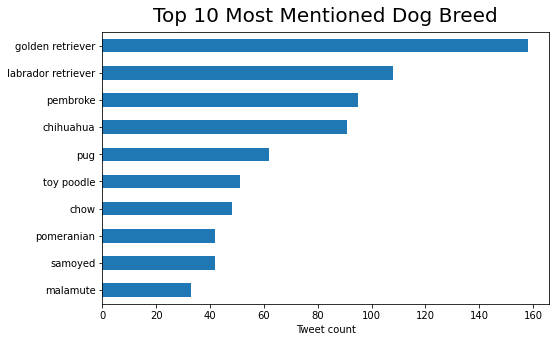

In [81]:
plt.figure(figsize=[8, 5])
top10_mentioned_breed = df.dog_breed.value_counts().head(10)
top10_mentioned_breed.sort_values().plot(kind="barh")
plt.title('Top 10 Most Mentioned Dog Breed', {'fontsize':20}, pad=10)
plt.xlabel("Tweet count");

Golden retriever is the most mentioned dog breed. It appeared 158 times in the data

### Question #2: What is the most rated dog breed

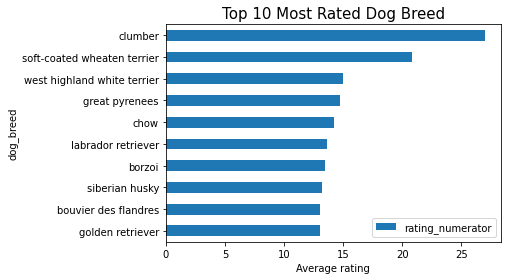

In [139]:
# filtering top 10 breeds most occuring breeds
most_rated_breed = df[['dog_breed','rating_numerator']].groupby('dog_breed').mean().round(1)
top10_rated_breed = most_rated_breed.sort_values('rating_numerator', ascending=False).head(10)
top10_rated_breed.sort_values('rating_numerator').plot(kind='barh')
plt.title('Top 10 Most Rated Dog Breed', {'fontsize':15})
plt.xlabel('Average rating');

Clumber is the most rated dog breed

In [124]:
top10_rated_breed

,rating_numerator
dog_breed,
clumber,27.0
soft-coated wheaten terrier,20.8
west highland white terrier,15.0
great pyrenees,14.7
chow,14.2
labrador retriever,13.6
borzoi,13.5
siberian husky,13.2
golden retriever,13.0


### Question #3: 

Which dog stage gets retweeted and favorited the most?

In [83]:
dog_stage_group = df[['dog_stage','favorite_count','retweet_count']].groupby('dog_stage').sum()
dog_stage_group

,favorite_count,retweet_count
dog_stage,,
doggo,1030328,363141
floofer,68787,25587
pupper,1253624,401865
puppo,478695,148768
unclassified,12734183,3809628


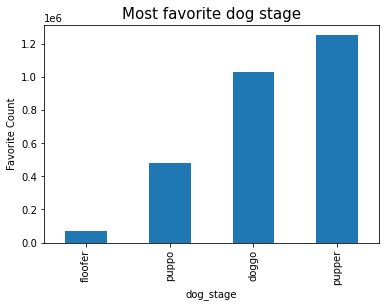

In [84]:
# excluding the 'unspecified' data
dog_stage_group.favorite_count[:4].sort_values().plot(y='favorite_count', kind='bar')
plt.title('Most favorite dog stage', {'fontsize':15})
plt.ylabel('Favorite Count');

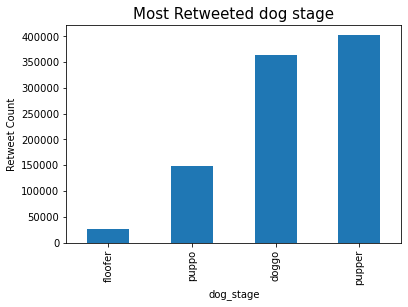

In [85]:
# excluding the 'unspecified' data
dog_stage_group.retweet_count[:4].sort_values().plot(y='retweet_count', kind='bar')
plt.title('Most Retweeted dog stage', {'fontsize':15})
plt.ylabel('Retweet Count');

Pupper is the most retweeted and most favorite dog_stage with values at 401,865 and 1,253,624 respectively

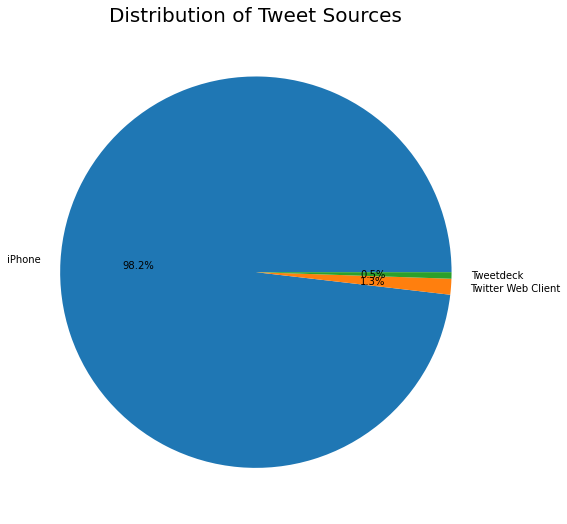

In [171]:
df.source.value_counts().plot(kind='pie', figsize=(10,9),autopct='%1.1f%%')
plt.title("Distribution of Tweet Sources", {'fontsize': 20})
plt.ylabel("");

### Insights:
1. Golden retriever is the most mentioned dog breed. It appeared 158 times in the data.

2. Pupper is the most retweeted and most favorite dog_stage with values at 401,865 and 1,253,624 respectively.

3. Clumber is the most rated dog breed

4. 98% of the tweets were made from an iPhone

<a id='conclude'></a>
## Conclusion and Limitations

In this project I went through a whole data wrangling process. The data gathering process included the programmatical and manual download. In the analysis I explored the following questions: 

1. What are the top 10 most mentioned dog_breed?
2. Clumber is the most rated dog breed
3. Which dog stage gets retweeted and favorited the most?
4. What is the most popular tweet source? 

**Limitations:**

This following should be noted while deriving insights from this analysis:
 - The findings in this analysis cannot be said to apply to the entire population of WeRateDogs users.
 - Further analysis can be done, like the time series analysis to shed more light on tweet activity